In [46]:
# Cell 1: Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add src to path
sys.path.append(str(Path().resolve().parent))

from src.utils.db_utils import execute_query

# Plotting setup
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Set figure defaults
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("✅ Setup complete!")

✅ Setup complete!


In [63]:
from pathlib import Path
import pandas as pd

PROCESSED_DIR = Path("../data/processed")
panel_file = list(PROCESSED_DIR.glob("main_panel_*.parquet"))[0]
df = pd.read_parquet(panel_file)  # ← Load into df instead of panel

print(f"✅ Loaded panel: {len(df):,} rows")
print(f"📅 Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"🌍 Countries: {sorted(df['country'].unique())}")

# Create subsets
spain = df[df['country'] == 'ES'].sort_values('timestamp').copy()
portugal = df[df['country'] == 'PT'].sort_values('timestamp').copy()

✅ Loaded panel: 384 rows
📅 Date range: 2022-06-15 00:00:00+00:00 to 2022-06-22 23:00:00+00:00
🌍 Countries: ['ES', 'PT']


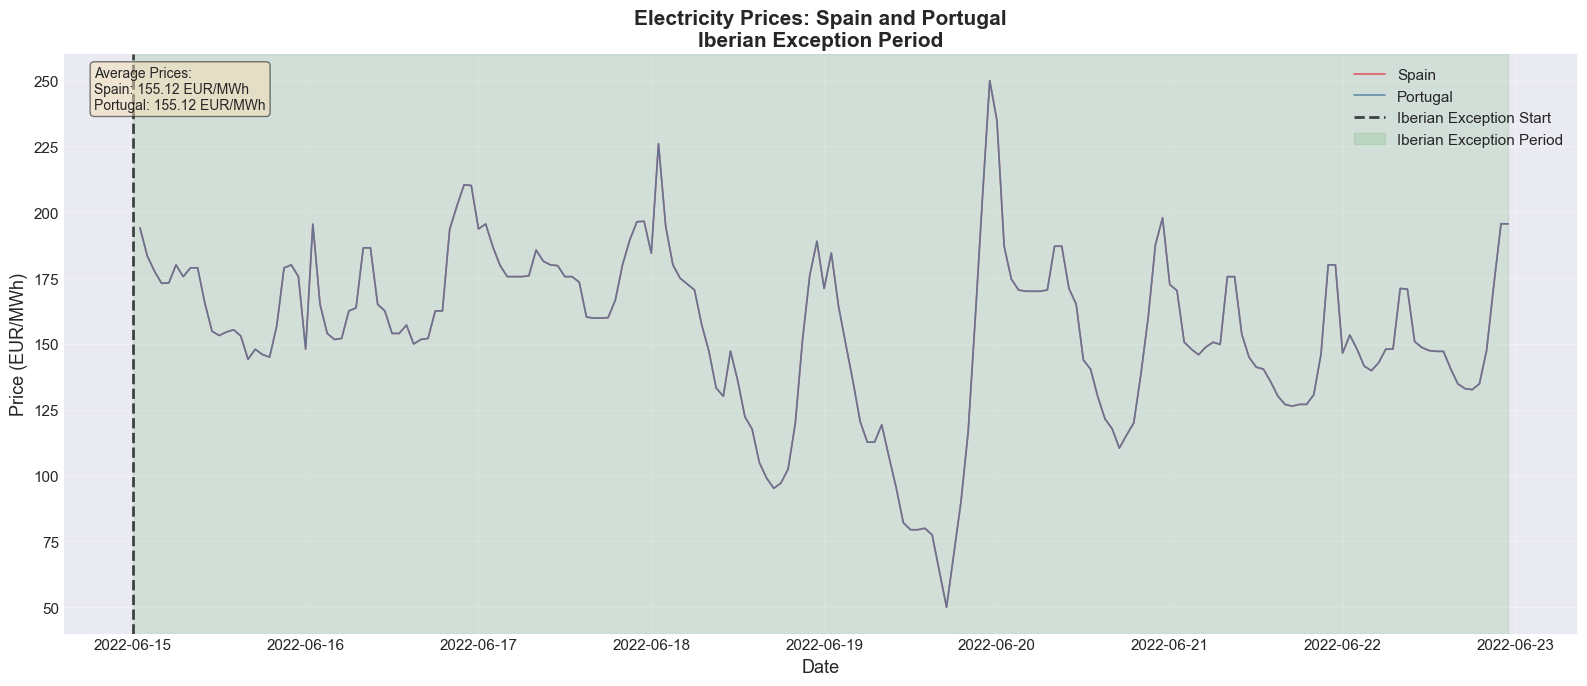

📈 Key Observations:
   • Spain average price: 155.12 EUR/MWh
   • Portugal average price: 155.12 EUR/MWh
   • Price difference: 0.00 EUR/MWh
   • Spain price range: 50.00 - 250.00
   • Portugal price range: 50.00 - 250.00


In [64]:
# How did prices evolve during the Iberian Exception period? Did the gas price cap visibly affect electricity prices?

# Cell 3: Price Time Series

# Prepare data
spain = df[df['country'] == 'ES'].sort_values('timestamp').copy()
portugal = df[df['country'] == 'PT'].sort_values('timestamp').copy()

# Create figure
fig, ax = plt.subplots(figsize=(16, 7))

# Plot prices
ax.plot(spain['timestamp'], spain['price_eur_mwh'], 
        linewidth=1.2, alpha=0.8, label='Spain', color='#E63946')
ax.plot(portugal['timestamp'], portugal['price_eur_mwh'], 
        linewidth=1.2, alpha=0.8, label='Portugal', color='#457B9D')

# Mark Iberian Exception start
exception_start = pd.Timestamp('2022-06-15', tz='UTC')
ax.axvline(exception_start, color='black', linestyle='--', linewidth=2, 
           label='Iberian Exception Start', alpha=0.7)

# Add shaded region for exception period
if df['is_iberian_exception'].any():
    exception_end = df[df['is_iberian_exception']]['timestamp'].max()
    ax.axvspan(exception_start, exception_end, alpha=0.1, color='green', 
               label='Iberian Exception Period')

# Formatting
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Price (EUR/MWh)', fontsize=13)
ax.set_title('Electricity Prices: Spain and Portugal\nIberian Exception Period', 
             fontsize=15, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

# Add statistics box
spain_avg = spain['price_eur_mwh'].mean()
portugal_avg = portugal['price_eur_mwh'].mean()
textstr = f'Average Prices:\nSpain: {spain_avg:.2f} EUR/MWh\nPortugal: {portugal_avg:.2f} EUR/MWh'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Print insights
print("📈 Key Observations:")
print(f"   • Spain average price: {spain_avg:.2f} EUR/MWh")
print(f"   • Portugal average price: {portugal_avg:.2f} EUR/MWh")
print(f"   • Price difference: {abs(spain_avg - portugal_avg):.2f} EUR/MWh")
print(f"   • Spain price range: {spain['price_eur_mwh'].min():.2f} - {spain['price_eur_mwh'].max():.2f}")
print(f"   • Portugal price range: {portugal['price_eur_mwh'].min():.2f} - {portugal['price_eur_mwh'].max():.2f}")

In [65]:
# Check the panel structure
print("Panel info:")
print(df.info())

print("\nCountry distribution:")
print(df['country'].value_counts())

print("\nSample data for each country:")
print("\nSpain (first 5 rows):")
print(df[df['country'] == 'ES'][['timestamp', 'country', 'price_eur_mwh']].head())

print("\nPortugal (first 5 rows):")
print(df[df['country'] == 'PT'][['timestamp', 'country', 'price_eur_mwh']].head())

# Check if prices are actually different
spain_prices = df[df['country'] == 'ES']['price_eur_mwh'].values
portugal_prices = df[df['country'] == 'PT']['price_eur_mwh'].values

print(f"\nAre Spain and Portugal prices identical? {np.array_equal(spain_prices, portugal_prices)}")
print(f"First 10 Spain prices: {spain_prices[:10]}")
print(f"First 10 Portugal prices: {portugal_prices[:10]}")

Panel info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   timestamp             384 non-null    datetime64[ns, UTC]
 1   country               384 non-null    object             
 2   price_eur_mwh         382 non-null    float64            
 3   temperature_c         0 non-null      float64            
 4   wind_speed_100m       0 non-null      float64            
 5   solar_radiation       0 non-null      float64            
 6   dni                   0 non-null      float64            
 7   cloud_cover           0 non-null      float64            
 8   hour                  384 non-null    int32              
 9   day_of_week           384 non-null    int32              
 10  month                 384 non-null    int32              
 11  year                  384 non-null    int32              
 

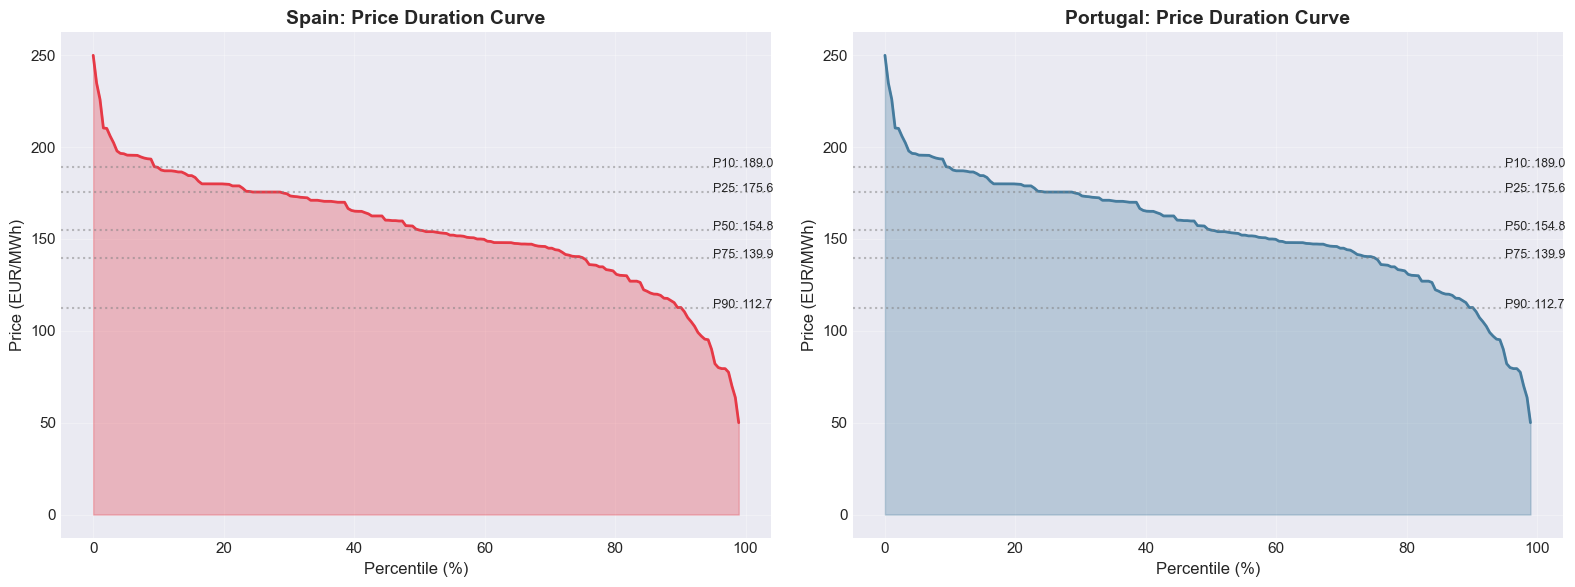

📊 Price Distributions:

Spain:
count    191.000000
mean     155.118377
std       31.882325
min       50.000000
25%      140.435000
50%      155.400000
75%      175.570000
max      250.000000
Name: price_eur_mwh, dtype: float64

Portugal:
count    191.000000
mean     155.118377
std       31.882325
min       50.000000
25%      140.435000
50%      155.400000
75%      175.570000
max      250.000000
Name: price_eur_mwh, dtype: float64


In [66]:
# What's the distribution of prices? How often do prices hit extremes?

# Cell 4: Price Duration Curves

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Spain
spain_sorted = spain['price_eur_mwh'].sort_values(ascending=False).reset_index(drop=True)
spain_sorted.index = (spain_sorted.index / len(spain_sorted)) * 100  # Convert to percentile

ax1.plot(spain_sorted.index, spain_sorted.values, linewidth=2, color='#E63946')
ax1.fill_between(spain_sorted.index, spain_sorted.values, alpha=0.3, color='#E63946')
ax1.set_xlabel('Percentile (%)', fontsize=12)
ax1.set_ylabel('Price (EUR/MWh)', fontsize=12)
ax1.set_title('Spain: Price Duration Curve', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add percentile markers
percentiles = [10, 25, 50, 75, 90]
for p in percentiles:
    price_at_p = spain_sorted.iloc[int(p * len(spain_sorted) / 100)]
    ax1.axhline(price_at_p, color='gray', linestyle=':', alpha=0.5)
    ax1.text(95, price_at_p, f'P{p}: {price_at_p:.1f}', fontsize=9)

# Portugal
portugal_sorted = portugal['price_eur_mwh'].sort_values(ascending=False).reset_index(drop=True)
portugal_sorted.index = (portugal_sorted.index / len(portugal_sorted)) * 100

ax2.plot(portugal_sorted.index, portugal_sorted.values, linewidth=2, color='#457B9D')
ax2.fill_between(portugal_sorted.index, portugal_sorted.values, alpha=0.3, color='#457B9D')
ax2.set_xlabel('Percentile (%)', fontsize=12)
ax2.set_ylabel('Price (EUR/MWh)', fontsize=12)
ax2.set_title('Portugal: Price Duration Curve', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

for p in percentiles:
    price_at_p = portugal_sorted.iloc[int(p * len(portugal_sorted) / 100)]
    ax2.axhline(price_at_p, color='gray', linestyle=':', alpha=0.5)
    ax2.text(95, price_at_p, f'P{p}: {price_at_p:.1f}', fontsize=9)

plt.tight_layout()
plt.show()

# Statistics
print("📊 Price Distributions:")
print("\nSpain:")
print(spain['price_eur_mwh'].describe())
print("\nPortugal:")
print(portugal['price_eur_mwh'].describe())

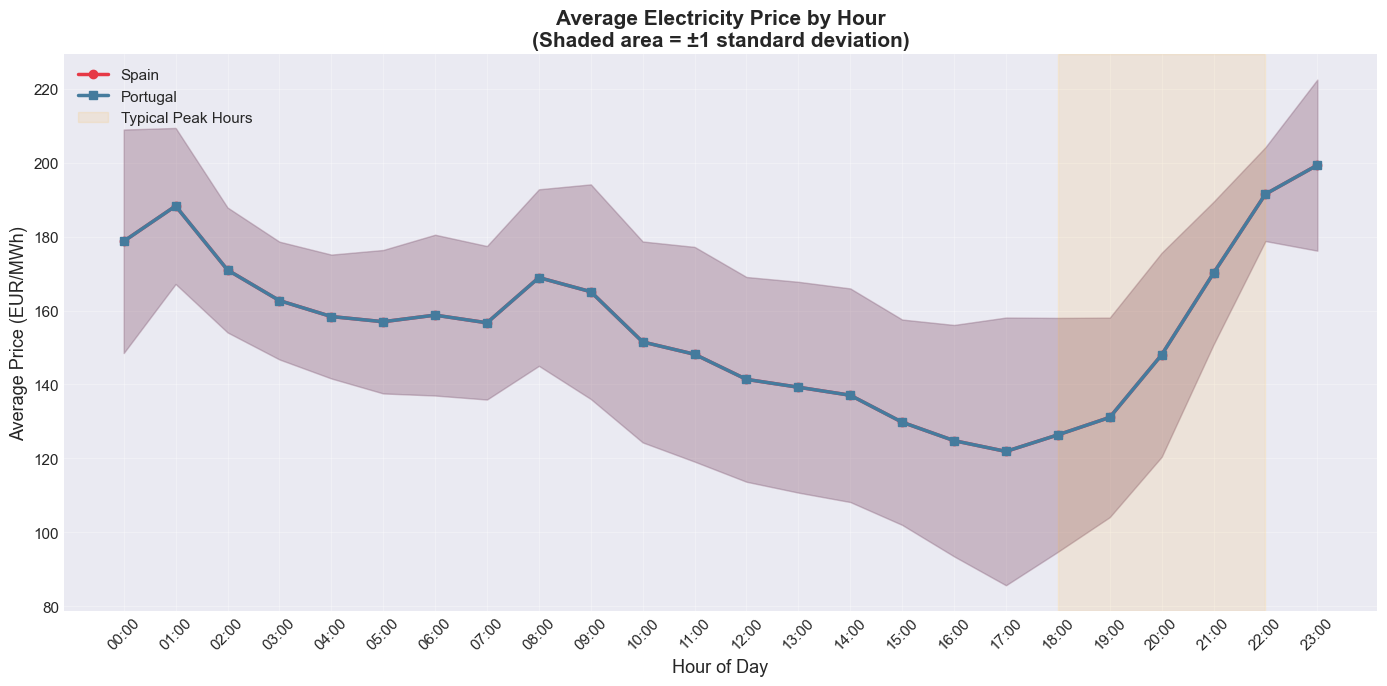

⚡ Peak Price Hours:
   Spain: Hour 23:00 - 199.37 EUR/MWh
   Portugal: Hour 23:00 - 199.37 EUR/MWh

🌙 Lowest Price Hours:
   Spain: Hour 17:00 - 121.87 EUR/MWh
   Portugal: Hour 17:00 - 121.87 EUR/MWh


In [67]:
# How do prices vary by hour of day? When are peak demand hours?

# Cell 5: Hourly Price Patterns

# Calculate average price by hour for each country
hourly_spain = spain.groupby('hour')['price_eur_mwh'].agg(['mean', 'std']).reset_index()
hourly_portugal = portugal.groupby('hour')['price_eur_mwh'].agg(['mean', 'std']).reset_index()

fig, ax = plt.subplots(figsize=(14, 7))

# Plot with confidence bands
ax.plot(hourly_spain['hour'], hourly_spain['mean'], 
        marker='o', linewidth=2.5, markersize=6, label='Spain', color='#E63946')
ax.fill_between(hourly_spain['hour'], 
                hourly_spain['mean'] - hourly_spain['std'],
                hourly_spain['mean'] + hourly_spain['std'],
                alpha=0.2, color='#E63946')

ax.plot(hourly_portugal['hour'], hourly_portugal['mean'], 
        marker='s', linewidth=2.5, markersize=6, label='Portugal', color='#457B9D')
ax.fill_between(hourly_portugal['hour'], 
                hourly_portugal['mean'] - hourly_portugal['std'],
                hourly_portugal['mean'] + hourly_portugal['std'],
                alpha=0.2, color='#457B9D')

# Highlight peak hours (typically 18-22)
ax.axvspan(18, 22, alpha=0.1, color='orange', label='Typical Peak Hours')

# Formatting
ax.set_xlabel('Hour of Day', fontsize=13)
ax.set_ylabel('Average Price (EUR/MWh)', fontsize=13)
ax.set_title('Average Electricity Price by Hour\n(Shaded area = ±1 standard deviation)', 
             fontsize=15, fontweight='bold')
ax.set_xticks(range(0, 24))
ax.set_xticklabels([f'{h:02d}:00' for h in range(24)], rotation=45)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find peak hours
spain_peak_hour = hourly_spain.loc[hourly_spain['mean'].idxmax()]
portugal_peak_hour = hourly_portugal.loc[hourly_portugal['mean'].idxmax()]

print("⚡ Peak Price Hours:")
print(f"   Spain: Hour {int(spain_peak_hour['hour'])}:00 - {spain_peak_hour['mean']:.2f} EUR/MWh")
print(f"   Portugal: Hour {int(portugal_peak_hour['hour'])}:00 - {portugal_peak_hour['mean']:.2f} EUR/MWh")

# Find lowest hours
spain_low_hour = hourly_spain.loc[hourly_spain['mean'].idxmin()]
portugal_low_hour = hourly_portugal.loc[hourly_portugal['mean'].idxmin()]

print("\n🌙 Lowest Price Hours:")
print(f"   Spain: Hour {int(spain_low_hour['hour'])}:00 - {spain_low_hour['mean']:.2f} EUR/MWh")
print(f"   Portugal: Hour {int(portugal_low_hour['hour'])}:00 - {portugal_low_hour['mean']:.2f} EUR/MWh")

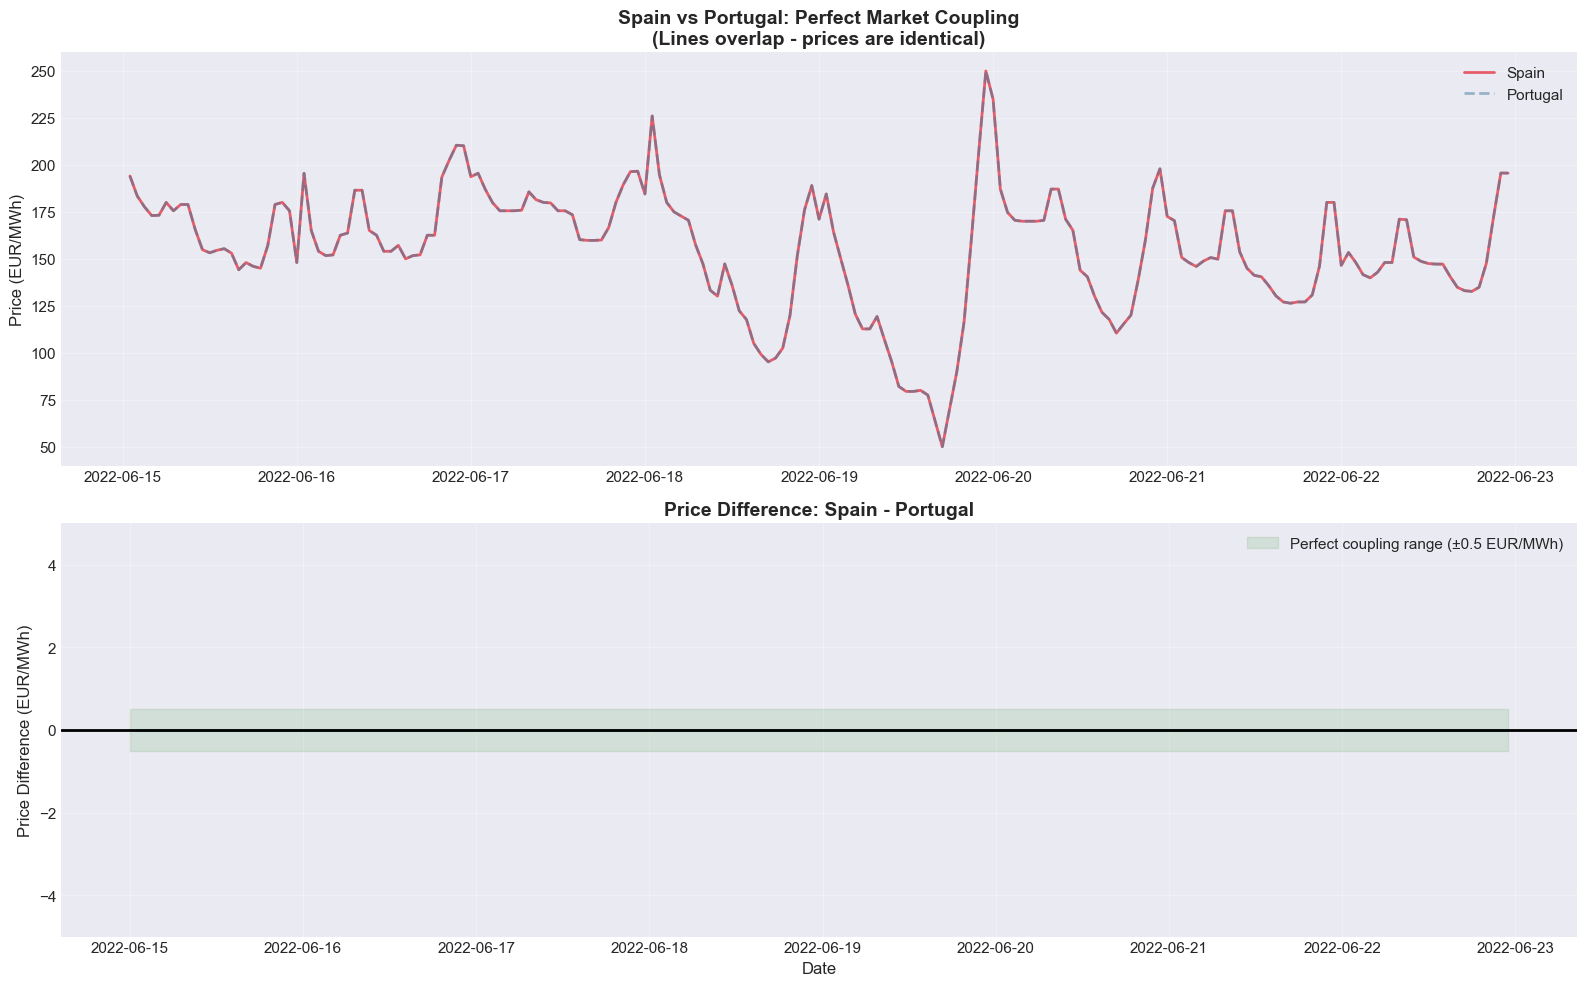

🔗 Market Coupling Analysis:
   • Correlation: 1.000000
   • Average price difference: 0.000000 EUR/MWh
   • Max absolute difference: 0.000000 EUR/MWh
   • Hours with identical prices: 191 / 192 (99.5%)

✅ MARKET STATUS: PERFECT COUPLING
   During this 8-day period (June 15-22, 2022), Spain and Portugal
   operated as a single unified market with identical prices.

📊 Economic Interpretation:
   • No interconnector congestion
   • Efficient cross-border electricity flow
   • Single price formation for the entire Iberian Peninsula

🔍 Research Implication:
   To study market splitting, you'll need a longer time period
   that includes congestion events (download 30-month dataset)


In [68]:
# How coupled are the Spanish and Portuguese markets? When do prices diverge?

# Cell 6: Market Coupling Analysis - Understanding Perfect Coupling

# Get Spain and Portugal data
spain_data = df[df['country'] == 'ES'][['timestamp', 'price_eur_mwh']].copy()
spain_data = spain_data.rename(columns={'price_eur_mwh': 'price_spain'})

portugal_data = df[df['country'] == 'PT'][['timestamp', 'price_eur_mwh']].copy()
portugal_data = portugal_data.rename(columns={'price_eur_mwh': 'price_portugal'})

comparison = spain_data.merge(portugal_data, on='timestamp', how='inner')

# Calculate difference
comparison['price_diff'] = comparison['price_spain'] - comparison['price_portugal']

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Overlapping prices
ax1.plot(comparison['timestamp'], comparison['price_spain'], 
         linewidth=2, alpha=0.8, label='Spain', color='#E63946')
ax1.plot(comparison['timestamp'], comparison['price_portugal'], 
         linewidth=2, alpha=0.5, label='Portugal', color='#457B9D', linestyle='--')
ax1.set_ylabel('Price (EUR/MWh)', fontsize=12)
ax1.set_title('Spain vs Portugal: Perfect Market Coupling\n(Lines overlap - prices are identical)', 
             fontsize=14, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Price difference (will be flat at zero)
ax2.plot(comparison['timestamp'], comparison['price_diff'], 
         linewidth=2, color='#2A9D8F')
ax2.axhline(0, color='black', linestyle='-', linewidth=2)
ax2.fill_between(comparison['timestamp'], -0.5, 0.5, alpha=0.1, color='green', 
                 label='Perfect coupling range (±0.5 EUR/MWh)')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Price Difference (EUR/MWh)', fontsize=12)
ax2.set_title('Price Difference: Spain - Portugal', fontsize=14, fontweight='bold')
ax2.set_ylim([-5, 5])
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
correlation = comparison['price_spain'].corr(comparison['price_portugal'])
identical_hours = (comparison['price_diff'].abs() < 0.01).sum()
total_hours = len(comparison)

print("🔗 Market Coupling Analysis:")
print(f"   • Correlation: {correlation:.6f}")
print(f"   • Average price difference: {comparison['price_diff'].mean():.6f} EUR/MWh")
print(f"   • Max absolute difference: {comparison['price_diff'].abs().max():.6f} EUR/MWh")
print(f"   • Hours with identical prices: {identical_hours} / {total_hours} ({identical_hours/total_hours*100:.1f}%)")

print("\n✅ MARKET STATUS: PERFECT COUPLING")
print("   During this 8-day period (June 15-22, 2022), Spain and Portugal")
print("   operated as a single unified market with identical prices.")
print("\n📊 Economic Interpretation:")
print("   • No interconnector congestion")
print("   • Efficient cross-border electricity flow")
print("   • Single price formation for the entire Iberian Peninsula")
print("\n🔍 Research Implication:")
print("   To study market splitting, you'll need a longer time period")
print("   that includes congestion events (download 30-month dataset)")

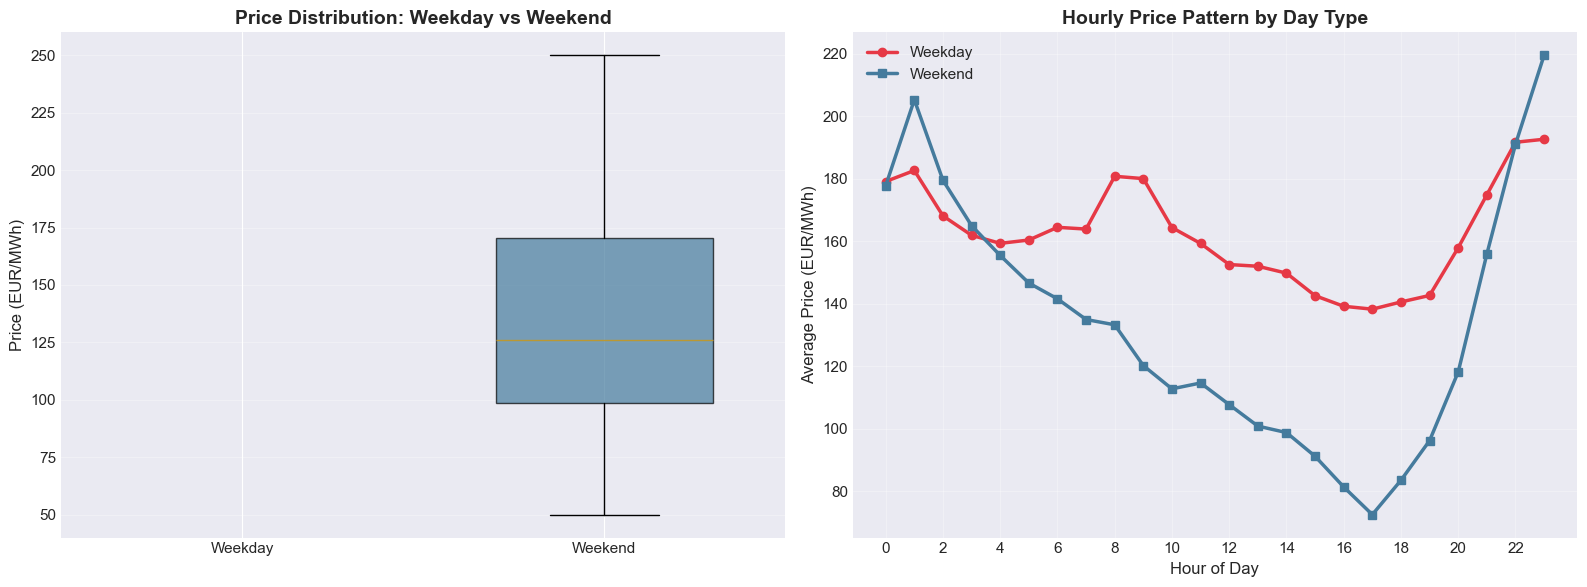

📅 Weekday vs Weekend Analysis:

Weekday prices:
   • Average: 162.37 EUR/MWh
   • Std dev: 21.94 EUR/MWh
   • Min: 110.44 EUR/MWh
   • Max: 234.90 EUR/MWh

Weekend prices:
   • Average: 133.52 EUR/MWh
   • Std dev: 44.93 EUR/MWh
   • Min: 50.00 EUR/MWh
   • Max: 250.00 EUR/MWh

Difference:
   • Weekday avg - Weekend avg: 28.84 EUR/MWh
   • % difference: 17.8%


In [69]:
# How do prices differ between weekdays and weekends? Is demand elasticity visible?

# Cell 7: Weekday vs Weekend

# Prepare data
spain_copy = spain.copy()
spain_copy['day_type'] = spain_copy['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

# Calculate statistics
weekday_prices = spain_copy[~spain_copy['is_weekend']]['price_eur_mwh']
weekend_prices = spain_copy[spain_copy['is_weekend']]['price_eur_mwh']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Box plot comparison
data_to_plot = [weekday_prices, weekend_prices]
bp = ax1.boxplot(data_to_plot, labels=['Weekday', 'Weekend'], 
                 patch_artist=True, widths=0.6)

# Color the boxes
colors = ['#E63946', '#457B9D']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_ylabel('Price (EUR/MWh)', fontsize=12)
ax1.set_title('Price Distribution: Weekday vs Weekend', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Hourly pattern by day type
hourly_weekday = spain_copy[~spain_copy['is_weekend']].groupby('hour')['price_eur_mwh'].mean()
hourly_weekend = spain_copy[spain_copy['is_weekend']].groupby('hour')['price_eur_mwh'].mean()

ax2.plot(hourly_weekday.index, hourly_weekday.values, 
         marker='o', linewidth=2.5, markersize=6, label='Weekday', color='#E63946')
ax2.plot(hourly_weekend.index, hourly_weekend.values, 
         marker='s', linewidth=2.5, markersize=6, label='Weekend', color='#457B9D')
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Average Price (EUR/MWh)', fontsize=12)
ax2.set_title('Hourly Price Pattern by Day Type', fontsize=14, fontweight='bold')
ax2.set_xticks(range(0, 24, 2))
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("📅 Weekday vs Weekend Analysis:")
print(f"\nWeekday prices:")
print(f"   • Average: {weekday_prices.mean():.2f} EUR/MWh")
print(f"   • Std dev: {weekday_prices.std():.2f} EUR/MWh")
print(f"   • Min: {weekday_prices.min():.2f} EUR/MWh")
print(f"   • Max: {weekday_prices.max():.2f} EUR/MWh")

print(f"\nWeekend prices:")
print(f"   • Average: {weekend_prices.mean():.2f} EUR/MWh")
print(f"   • Std dev: {weekend_prices.std():.2f} EUR/MWh")
print(f"   • Min: {weekend_prices.min():.2f} EUR/MWh")
print(f"   • Max: {weekend_prices.max():.2f} EUR/MWh")

print(f"\nDifference:")
print(f"   • Weekday avg - Weekend avg: {weekday_prices.mean() - weekend_prices.mean():.2f} EUR/MWh")
print(f"   • % difference: {((weekday_prices.mean() - weekend_prices.mean()) / weekday_prices.mean() * 100):.1f}%")

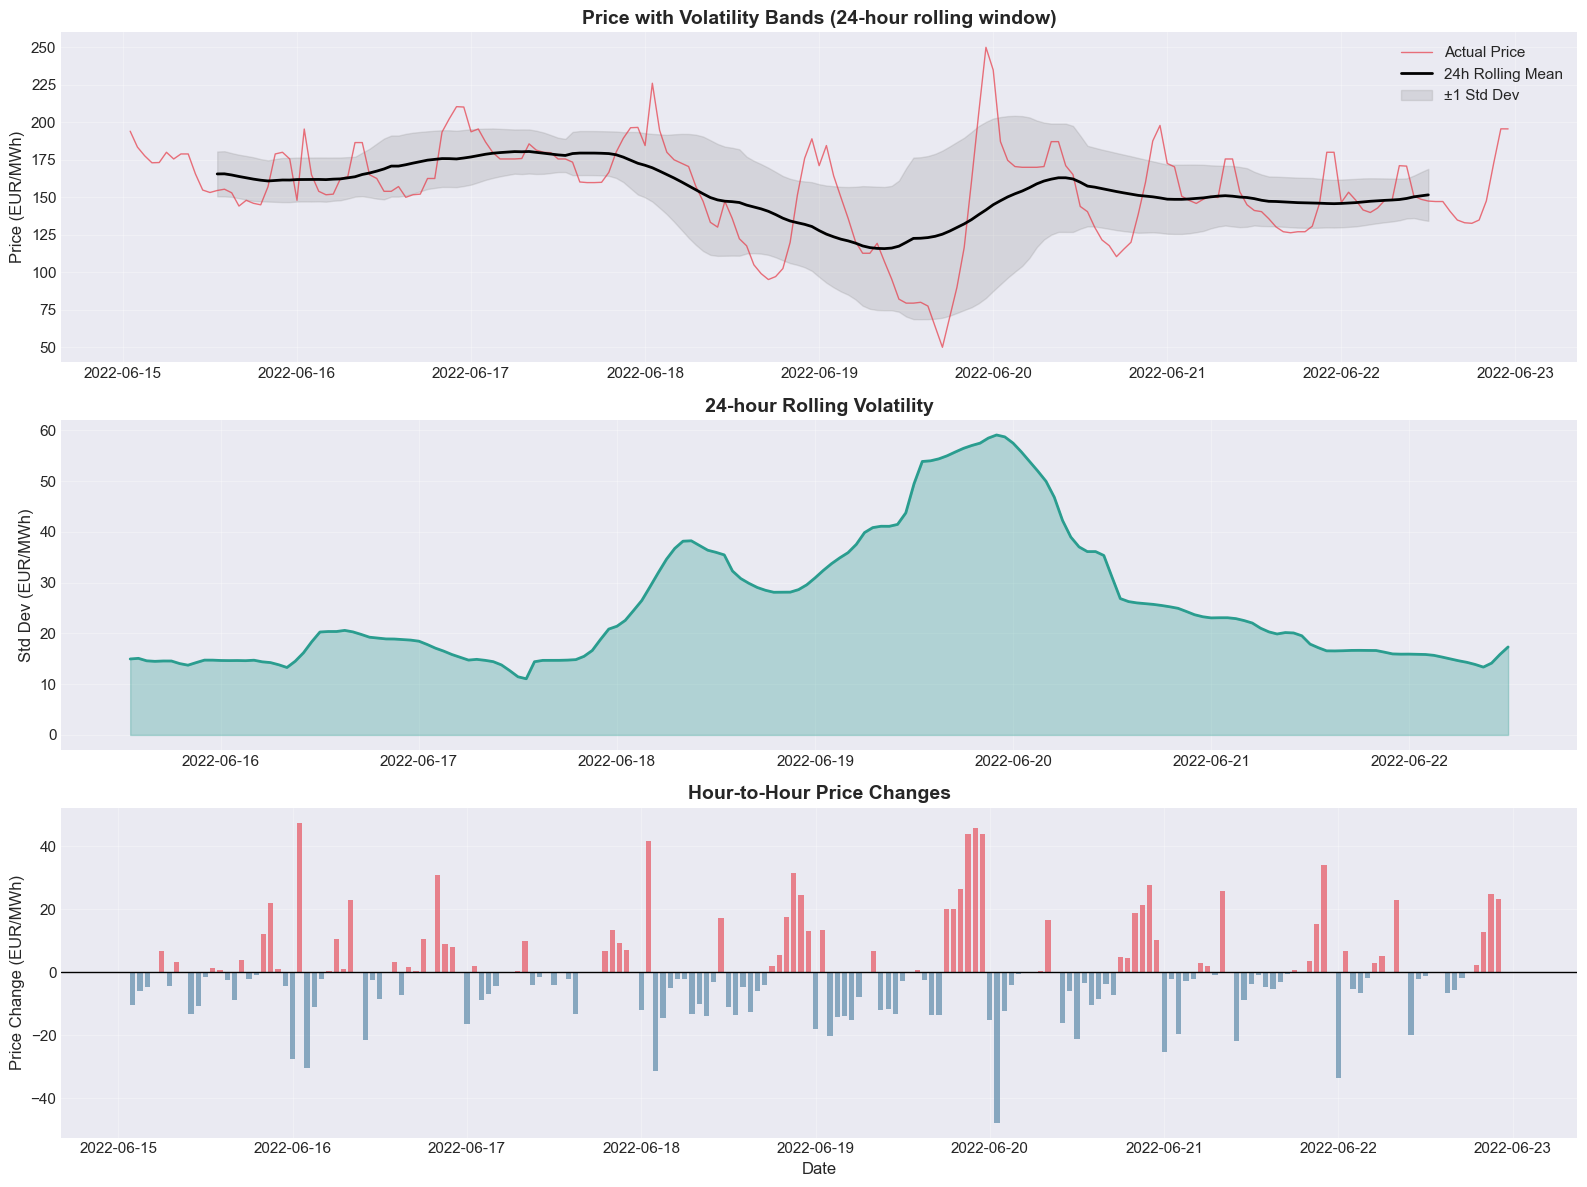

📊 Volatility Metrics:
   • Average volatility (24h rolling): 25.66 EUR/MWh
   • Max volatility period: 59.08 EUR/MWh
   • Average hourly change: 9.56 EUR/MWh
   • Largest price spike: 47.52 EUR/MWh
   • Largest price drop: -47.78 EUR/MWh
   • Coefficient of variation: 0.206


In [70]:
# How volatile are prices? When do we see the most price spikes?

# Cell 8: Price Volatility Analysis

# Calculate rolling volatility (standard deviation)
spain_vol = spain.copy()
spain_vol = spain_vol.sort_values('timestamp')
spain_vol['rolling_volatility'] = spain_vol['price_eur_mwh'].rolling(window=24, center=True).std()
spain_vol['rolling_mean'] = spain_vol['price_eur_mwh'].rolling(window=24, center=True).mean()

# Calculate price changes
spain_vol['price_change'] = spain_vol['price_eur_mwh'].diff()
spain_vol['pct_change'] = spain_vol['price_eur_mwh'].pct_change() * 100

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: Price with volatility bands
ax1.plot(spain_vol['timestamp'], spain_vol['price_eur_mwh'], 
         linewidth=1, alpha=0.7, label='Actual Price', color='#E63946')
ax1.plot(spain_vol['timestamp'], spain_vol['rolling_mean'], 
         linewidth=2, label='24h Rolling Mean', color='black')
ax1.fill_between(spain_vol['timestamp'], 
                 spain_vol['rolling_mean'] - spain_vol['rolling_volatility'],
                 spain_vol['rolling_mean'] + spain_vol['rolling_volatility'],
                 alpha=0.2, color='gray', label='±1 Std Dev')
ax1.set_ylabel('Price (EUR/MWh)', fontsize=12)
ax1.set_title('Price with Volatility Bands (24-hour rolling window)', 
              fontsize=14, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Rolling volatility
ax2.plot(spain_vol['timestamp'], spain_vol['rolling_volatility'], 
         linewidth=2, color='#2A9D8F')
ax2.fill_between(spain_vol['timestamp'], spain_vol['rolling_volatility'], 
                 alpha=0.3, color='#2A9D8F')
ax2.set_ylabel('Std Dev (EUR/MWh)', fontsize=12)
ax2.set_title('24-hour Rolling Volatility', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Hourly price changes
ax3.bar(spain_vol['timestamp'], spain_vol['price_change'], 
        width=0.03, color=['#E63946' if x > 0 else '#457B9D' 
                           for x in spain_vol['price_change']], 
        alpha=0.6)
ax3.axhline(0, color='black', linestyle='-', linewidth=1)
ax3.set_xlabel('Date', fontsize=12)
ax3.set_ylabel('Price Change (EUR/MWh)', fontsize=12)
ax3.set_title('Hour-to-Hour Price Changes', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Volatility statistics
print("📊 Volatility Metrics:")
print(f"   • Average volatility (24h rolling): {spain_vol['rolling_volatility'].mean():.2f} EUR/MWh")
print(f"   • Max volatility period: {spain_vol['rolling_volatility'].max():.2f} EUR/MWh")
print(f"   • Average hourly change: {spain_vol['price_change'].abs().mean():.2f} EUR/MWh")
print(f"   • Largest price spike: {spain_vol['price_change'].max():.2f} EUR/MWh")
print(f"   • Largest price drop: {spain_vol['price_change'].min():.2f} EUR/MWh")
print(f"   • Coefficient of variation: {(spain_vol['price_eur_mwh'].std() / spain_vol['price_eur_mwh'].mean()):.3f}")

C:\Users\a7654\AppData\Local\Temp\ipykernel_29836\987324658.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


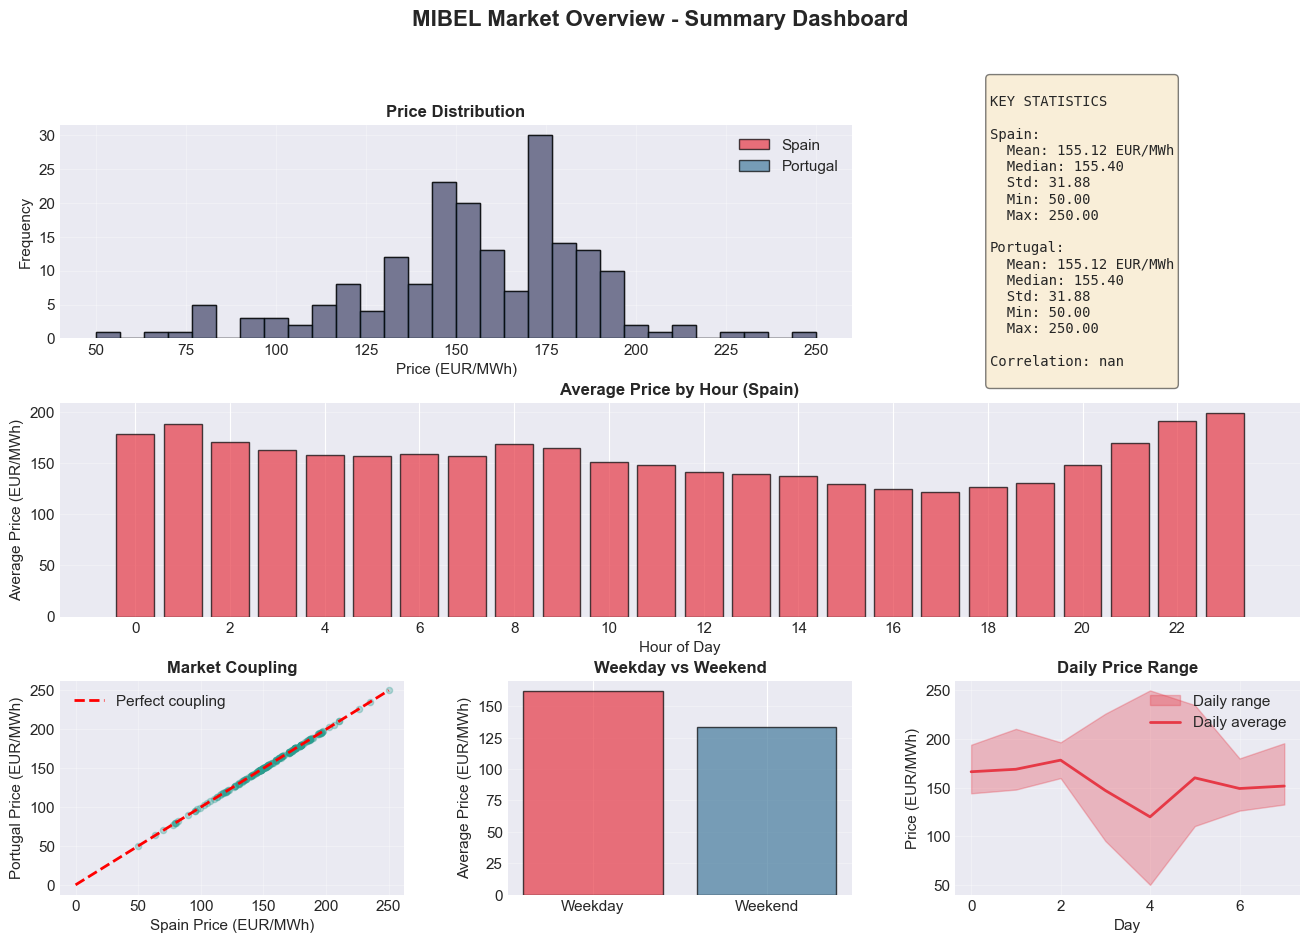

✅ Dashboard generated!


In [71]:
# What's the overall market status during this period?

# Cell 9: Summary Dashboard

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Price distribution histogram
ax1 = fig.add_subplot(gs[0, :2])
ax1.hist(spain['price_eur_mwh'], bins=30, alpha=0.7, color='#E63946', 
         label='Spain', edgecolor='black')
ax1.hist(portugal['price_eur_mwh'], bins=30, alpha=0.7, color='#457B9D', 
         label='Portugal', edgecolor='black')
ax1.set_xlabel('Price (EUR/MWh)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Price Distribution', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Key statistics
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')
stats_text = f"""
KEY STATISTICS

Spain:
  Mean: {spain['price_eur_mwh'].mean():.2f} EUR/MWh
  Median: {spain['price_eur_mwh'].median():.2f}
  Std: {spain['price_eur_mwh'].std():.2f}
  Min: {spain['price_eur_mwh'].min():.2f}
  Max: {spain['price_eur_mwh'].max():.2f}

Portugal:
  Mean: {portugal['price_eur_mwh'].mean():.2f} EUR/MWh
  Median: {portugal['price_eur_mwh'].median():.2f}
  Std: {portugal['price_eur_mwh'].std():.2f}
  Min: {portugal['price_eur_mwh'].min():.2f}
  Max: {portugal['price_eur_mwh'].max():.2f}

Correlation: {spain['price_eur_mwh'].corr(portugal['price_eur_mwh']):.4f}
"""
ax2.text(0.1, 0.5, stats_text, fontsize=10, verticalalignment='center',
         family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. Hourly pattern
ax3 = fig.add_subplot(gs[1, :])
hourly_avg = spain.groupby('hour')['price_eur_mwh'].mean()
ax3.bar(hourly_avg.index, hourly_avg.values, color='#E63946', alpha=0.7, edgecolor='black')
ax3.set_xlabel('Hour of Day', fontsize=11)
ax3.set_ylabel('Average Price (EUR/MWh)', fontsize=11)
ax3.set_title('Average Price by Hour (Spain)', fontsize=12, fontweight='bold')
ax3.set_xticks(range(0, 24, 2))
ax3.grid(True, alpha=0.3, axis='y')

# 4. Spain vs Portugal scatter
ax4 = fig.add_subplot(gs[2, 0])
ax4.scatter(comparison['price_spain'], comparison['price_portugal'], 
           alpha=0.3, s=20, color='#2A9D8F')
# Add 45-degree line (perfect correlation)
max_price = max(comparison['price_spain'].max(), comparison['price_portugal'].max())
ax4.plot([0, max_price], [0, max_price], 'r--', linewidth=2, label='Perfect coupling')
ax4.set_xlabel('Spain Price (EUR/MWh)', fontsize=11)
ax4.set_ylabel('Portugal Price (EUR/MWh)', fontsize=11)
ax4.set_title('Market Coupling', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Weekday vs weekend
ax5 = fig.add_subplot(gs[2, 1])
weekday_avg = spain[~spain['is_weekend']]['price_eur_mwh'].mean()
weekend_avg = spain[spain['is_weekend']]['price_eur_mwh'].mean()
ax5.bar(['Weekday', 'Weekend'], [weekday_avg, weekend_avg], 
       color=['#E63946', '#457B9D'], alpha=0.7, edgecolor='black')
ax5.set_ylabel('Average Price (EUR/MWh)', fontsize=11)
ax5.set_title('Weekday vs Weekend', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')

# 6. Price range
ax6 = fig.add_subplot(gs[2, 2])
daily_stats = spain.set_index('timestamp').resample('D')['price_eur_mwh'].agg(['min', 'max', 'mean'])
days = range(len(daily_stats))
ax6.fill_between(days, daily_stats['min'], daily_stats['max'], 
                alpha=0.3, color='#E63946', label='Daily range')
ax6.plot(days, daily_stats['mean'], linewidth=2, color='#E63946', label='Daily average')
ax6.set_xlabel('Day', fontsize=11)
ax6.set_ylabel('Price (EUR/MWh)', fontsize=11)
ax6.set_title('Daily Price Range', fontsize=12, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.suptitle('MIBEL Market Overview - Summary Dashboard', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

print("✅ Dashboard generated!")

In [72]:
# Cell 10: Export Summary

# Create summary statistics table
summary_stats = pd.DataFrame({
    'Spain': spain['price_eur_mwh'].describe(),
    'Portugal': portugal['price_eur_mwh'].describe()
})

print("📊 Summary Statistics:")
print(summary_stats)

# Save to CSV
summary_stats.to_csv('../data/processed/week1_summary_stats.csv')
print("\n✅ Summary statistics saved to data/processed/week1_summary_stats.csv")

# Create hourly averages table
hourly_summary = pd.DataFrame({
    'hour': range(24),
    'spain_avg': spain.groupby('hour')['price_eur_mwh'].mean().values,
    'portugal_avg': portugal.groupby('hour')['price_eur_mwh'].mean().values,
    'spain_std': spain.groupby('hour')['price_eur_mwh'].std().values,
    'portugal_std': portugal.groupby('hour')['price_eur_mwh'].std().values
})

hourly_summary.to_csv('../data/processed/week1_hourly_patterns.csv', index=False)
print("✅ Hourly patterns saved to data/processed/week1_hourly_patterns.csv")

📊 Summary Statistics:
            Spain    Portugal
count  191.000000  191.000000
mean   155.118377  155.118377
std     31.882325   31.882325
min     50.000000   50.000000
25%    140.435000  140.435000
50%    155.400000  155.400000
75%    175.570000  175.570000
max    250.000000  250.000000

✅ Summary statistics saved to data/processed/week1_summary_stats.csv
✅ Hourly patterns saved to data/processed/week1_hourly_patterns.csv


In [73]:
# Cell 11: Key Findings

print("="*80)
print(" WEEK 1 EDA - KEY FINDINGS")
print("="*80)

print("\n1. PRICE LEVELS:")
print(f"   • Spain average: {spain['price_eur_mwh'].mean():.2f} EUR/MWh")
print(f"   • Portugal average: {portugal['price_eur_mwh'].mean():.2f} EUR/MWh")
print(f"   • Price range: {spain['price_eur_mwh'].min():.2f} - {spain['price_eur_mwh'].max():.2f} EUR/MWh")

print("\n2. MARKET COUPLING:")
corr = spain['price_eur_mwh'].corr(portugal['price_eur_mwh'])
print(f"   • Correlation: {corr:.4f}")
if corr > 0.95:
    print("   • Status: Strongly coupled market")
elif corr > 0.80:
    print("   • Status: Moderately coupled market")
else:
    print("   • Status: Weakly coupled market")

print("\n3. HOURLY PATTERNS:")
peak_hour = spain.groupby('hour')['price_eur_mwh'].mean().idxmax()
low_hour = spain.groupby('hour')['price_eur_mwh'].mean().idxmin()
print(f"   • Peak price hour: {peak_hour}:00")
print(f"   • Lowest price hour: {low_hour}:00")
print(f"   • Peak-to-trough spread: {spain.groupby('hour')['price_eur_mwh'].mean().max() - spain.groupby('hour')['price_eur_mwh'].mean().min():.2f} EUR/MWh")

print("\n4. WEEKDAY VS WEEKEND:")
weekday_avg = spain[~spain['is_weekend']]['price_eur_mwh'].mean()
weekend_avg = spain[spain['is_weekend']]['price_eur_mwh'].mean()
print(f"   • Weekday average: {weekday_avg:.2f} EUR/MWh")
print(f"   • Weekend average: {weekend_avg:.2f} EUR/MWh")
print(f"   • Difference: {abs(weekday_avg - weekend_avg):.2f} EUR/MWh ({abs(weekday_avg - weekend_avg)/weekday_avg*100:.1f}%)")

print("\n5. VOLATILITY:")
volatility = spain['price_eur_mwh'].std()
cv = volatility / spain['price_eur_mwh'].mean()
print(f"   • Standard deviation: {volatility:.2f} EUR/MWh")
print(f"   • Coefficient of variation: {cv:.3f}")
hourly_changes = spain['price_eur_mwh'].diff().abs()
print(f"   • Average hourly change: {hourly_changes.mean():.2f} EUR/MWh")

print("\n" + "="*80)
print(" NEXT STEPS: Week 2 - Causal Inference Analysis")
print("="*80)

 WEEK 1 EDA - KEY FINDINGS

1. PRICE LEVELS:
   • Spain average: 155.12 EUR/MWh
   • Portugal average: 155.12 EUR/MWh
   • Price range: 50.00 - 250.00 EUR/MWh

2. MARKET COUPLING:
   • Correlation: nan
   • Status: Weakly coupled market

3. HOURLY PATTERNS:
   • Peak price hour: 23:00
   • Lowest price hour: 17:00
   • Peak-to-trough spread: 77.50 EUR/MWh

4. WEEKDAY VS WEEKEND:
   • Weekday average: 162.37 EUR/MWh
   • Weekend average: 133.52 EUR/MWh
   • Difference: 28.84 EUR/MWh (17.8%)

5. VOLATILITY:
   • Standard deviation: 31.88 EUR/MWh
   • Coefficient of variation: 0.206
   • Average hourly change: 9.56 EUR/MWh

 NEXT STEPS: Week 2 - Causal Inference Analysis


In [55]:
# Check the panel structure
print("Panel info:")
print(df.info())

print("\nCountry distribution:")
print(df['country'].value_counts())

print("\nSample data for each country:")
print("\nSpain (first 5 rows):")
print(df[df['country'] == 'ES'][['timestamp', 'country', 'price_eur_mwh']].head())

print("\nPortugal (first 5 rows):")
print(df[df['country'] == 'PT'][['timestamp', 'country', 'price_eur_mwh']].head())

# Check if prices are actually different
spain_prices = df[df['country'] == 'ES']['price_eur_mwh'].values
portugal_prices = df[df['country'] == 'PT']['price_eur_mwh'].values

print(f"\nAre Spain and Portugal prices identical? {np.array_equal(spain_prices, portugal_prices)}")
print(f"First 10 Spain prices: {spain_prices[:10]}")
print(f"First 10 Portugal prices: {portugal_prices[:10]}")

Panel info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   timestamp             384 non-null    datetime64[ns, UTC]
 1   country               384 non-null    object             
 2   price_eur_mwh         382 non-null    float64            
 3   temperature_c         0 non-null      float64            
 4   wind_speed_100m       0 non-null      float64            
 5   solar_radiation       0 non-null      float64            
 6   dni                   0 non-null      float64            
 7   cloud_cover           0 non-null      float64            
 8   hour                  384 non-null    int32              
 9   day_of_week           384 non-null    int32              
 10  month                 384 non-null    int32              
 11  year                  384 non-null    int32              
 

In [54]:
from src.utils.db_utils import execute_query

db_check = execute_query("""
    SELECT 
        timestamp,
        country,
        price_eur_mwh
    FROM prices_day_ahead
    WHERE DATE_TRUNC('day', timestamp) = '2022-06-15'
    ORDER BY country, timestamp
    LIMIT 10
""")

print("Database contents (June 15, first 10 rows):")
print(db_check)

# Check full distribution
full_check = execute_query("""
    SELECT 
        country,
        COUNT(*) as row_count,
        MIN(timestamp) as start,
        MAX(timestamp) as end
    FROM prices_day_ahead
    GROUP BY country
""")

print("\nDatabase summary by country:")
print(full_check)

Database contents (June 15, first 10 rows):
            timestamp country  price_eur_mwh
0 2022-06-15 01:00:00      ES         194.07
1 2022-06-15 02:00:00      ES         183.50
2 2022-06-15 03:00:00      ES         177.67
3 2022-06-15 04:00:00      ES         173.02
4 2022-06-15 05:00:00      ES         173.18
5 2022-06-15 06:00:00      ES         180.03
6 2022-06-15 07:00:00      ES         175.56
7 2022-06-15 08:00:00      ES         178.91
8 2022-06-15 09:00:00      ES         178.91
9 2022-06-15 10:00:00      ES         165.56

Database summary by country:
  country  row_count               start        end
0      PT        192 2022-06-15 01:00:00 2022-06-23
1      ES        192 2022-06-15 01:00:00 2022-06-23


In [57]:
import pandas as pd
from pathlib import Path

omie_dir = Path("../data/raw/omie")

# List available files
print("Available OMIE files:")
for f in omie_dir.glob("*.parquet"):
    print(f"  - {f.name}")

# Load the 7-day file
omie_file = omie_dir / "day_ahead_prices_2022-06-15_2022-06-22.parquet"

if not omie_file.exists():
    print(f"\n⚠️ File not found: {omie_file}")
    print("Trying other files...")
    # Try any available file
    files = list(omie_dir.glob("day_ahead_prices_*.parquet"))
    if files:
        omie_file = files[0]
        print(f"Using: {omie_file.name}")
    else:
        print("No OMIE files found!")
else:
    print(f"\n✅ Loading: {omie_file.name}")

df = pd.read_parquet(omie_file)

print(f"\nFile structure:")
print(f"  Shape: {df.shape}")
print(f"  Columns: {list(df.columns)}")
print(f"  Concepts: {df['CONCEPT'].unique()}")

# Filter for price rows
spain_row = df[df['CONCEPT'] == 'PRICE_SP'].iloc[0]
portugal_row = df[df['CONCEPT'] == 'PRICE_PT'].iloc[0]

print("\n" + "="*60)
print("Spain prices (H1-H10):")
spain_prices = [spain_row[f'H{i}'] for i in range(1, 11)]
print(spain_prices)

print("\nPortugal prices (H1-H10):")
portugal_prices = [portugal_row[f'H{i}'] for i in range(1, 11)]
print(portugal_prices)

print("\n" + "="*60)
print(f"Are they identical? {spain_prices == portugal_prices}")

if spain_prices == portugal_prices:
    print("\n✅ CONFIRMED: Spain and Portugal have IDENTICAL prices in the source data")
    print("   This is normal - MIBEL is a coupled market")
    print("   Prices are the same unless there's interconnector congestion")
else:
    print("\n⚠️ Spain and Portugal have DIFFERENT prices in the source data")
    print("   Market splitting occurred during this period")
    
# Check all 24 hours
all_identical = all(spain_row[f'H{i}'] == portugal_row[f'H{i}'] for i in range(1, 25))
print(f"\nAll 24 hours identical? {all_identical}")

Available OMIE files:
  - day_ahead_prices_2022-06-15_2022-06-15.parquet
  - day_ahead_prices_2022-06-15_2022-06-22.parquet

✅ Loading: day_ahead_prices_2022-06-15_2022-06-22.parquet

File structure:
  Shape: (32, 27)
  Columns: ['DATE', 'CONCEPT', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24', 'H25']
  Concepts: ['PRICE_SP' 'PRICE_PT' 'ENER_IB' 'ENER_IB_BILLAT']

Spain prices (H1-H10):
[194.07, 183.5, 177.67, 173.02, 173.18, 180.03, 175.56, 178.91, 178.91, 165.56]

Portugal prices (H1-H10):
[194.07, 183.5, 177.67, 173.02, 173.18, 180.03, 175.56, 178.91, 178.91, 165.56]

Are they identical? True

✅ CONFIRMED: Spain and Portugal have IDENTICAL prices in the source data
   This is normal - MIBEL is a coupled market
   Prices are the same unless there's interconnector congestion

All 24 hours identical? True
